In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
df = pd.read_csv('House Price Prediction Dataset.csv')
df.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [30]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [31]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

**DATA PREPROCESSING**

In [ ]:
data = df.copy()

label_encoders = {}
categorical_cols = ['Location', 'Condition', 'Garage']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


**CLUSTERING K-MEANS**

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

le = LabelEncoder()
data['Location_encoded'] = le.fit_transform(data['Location'])

features_for_clustering = ['Area', 'Bedrooms', 'Bathrooms','Floors', 'Location_encoded']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features_for_clustering])

kmeans = KMeans(n_clusters=3, random_state=42)
original_clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = original_clusters

cluster_area_avg = data.groupby('Cluster')['Area'].mean()

sorted_clusters = cluster_area_avg.sort_values().index.tolist()

cluster_remap = {old: new for new, old in enumerate(sorted_clusters)}
data['Cluster'] = data['Cluster'].map(cluster_remap)

label_map = {0: 'Rumah kecil', 1: 'Rumah sedang', 2: 'Rumah besar'}
data['Kategori_Rumah'] = data['Cluster'].map(label_map)

print(data[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Location', 'Cluster', 'Kategori_Rumah']].head(10))


   Area  Bedrooms  Bathrooms  Floors  Location  Cluster Kategori_Rumah
0  1360         5          4       3         0        2    Rumah besar
1  4272         5          4       3         0        2    Rumah besar
2  3592         2          2       3         0        1   Rumah sedang
3   966         4          2       2         2        2    Rumah besar
4  4926         1          4       2         0        1   Rumah sedang
5  3944         1          2       1         3        0    Rumah kecil
6  3671         1          1       2         1        1   Rumah sedang
7  3419         2          4       1         2        0    Rumah kecil
8   630         2          2       1         1        0    Rumah kecil
9  2185         3          3       1         0        0    Rumah kecil


**VISUALISASI KLASTER LOKASI**

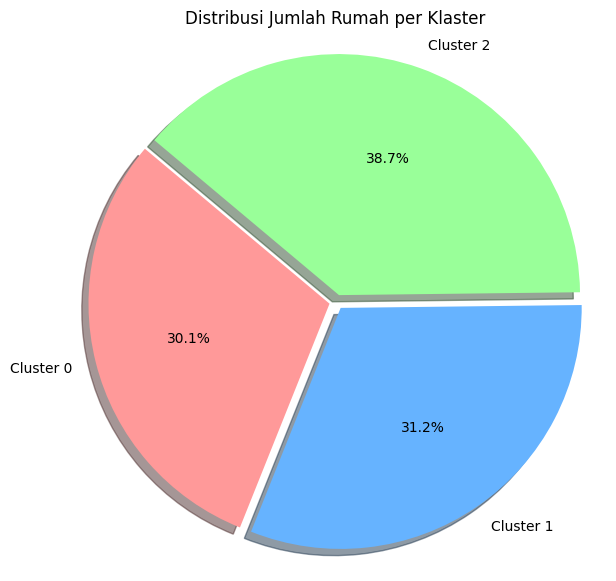

In [35]:
import matplotlib.pyplot as plt

cluster_counts = data['Cluster'].value_counts().sort_index()

labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']


colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(7, 7))
plt.pie(
    cluster_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.03]*3,  
    shadow=True
)
plt.title('Distribusi Jumlah Rumah per Klaster')
plt.axis('equal')  
plt.show()


**REGRESI PREDIKSI HARGA**

In [36]:
X = data.drop(columns=['Id', 'Price'])
y = data['Price']

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Root Mean Squared Error (RMSE): 294859.09
